# Projectile Motion

Most of you would have learned this in PH1104, your freshman mechanics course, where you are told the solution is
\begin{equation}
\begin{aligned}
x(t) &= x_0 + u_{0,x}(t), \\
y(t) &= y_0 + u_{0,y}(t) - \tfrac{1}{2} gt^2,
\end{aligned}
\end{equation}
where $\vec{r}(t) = (x(t), y(t))$ is the displacement of the particle at time $t$, $\vec{r}_0 = (x_0, y_0)$ is the initial displacement of the particle, $\vec{u}_0 = (u_{0,x}, u_{0,y})$ is the initial velocity of the particle, and $g$ is the acceleration due to gravity.

This solution comes actually from the equation of motion
\begin{equation}
m\frac{d^2\vec{r}}{dt^2} = m\vec{g},
\end{equation}
where
\begin{equation}
\vec{r}(t) = \begin{bmatrix} x(t) \\ y(t) \end{bmatrix}, \quad \vec{g} = \begin{bmatrix} 0 \\ -g \end{bmatrix}.
\end{equation}

To solve this equation of motion, let us first observe that the equation involves a second derivative of $x(t)$ with respect to time $t$ (a second-order ordinary differential equation), but most numerical methods we know of are for first-order ordinary differential equations.

## Convert $n$th-Order ODE to System of $n$ First-Order ODEs

A $n$th-order ODE of the form
\begin{equation}
\frac{d^nx}{dt^n} = f\left(t, x, \frac{dx}{dt}, \dots, \frac{d^{n-1}x}{dt^{n-1}}\right)
\end{equation}
can be converted into a system of $n$ first-order ODEs, by writing
\begin{align}
x(t) &= x_0(t), \\
\frac{dx_0}{dt} &= x_1(t), \\
\frac{dx_1}{dt} &= x_2(t), \\
 &\vdots \\
\frac{dx_{n-2}}{dt} &= x_{n-1}(t), \\
\frac{dx_{n-1}}{dt} &= f(t, x_0, x_1, \dots, x_{n-1}).
\end{align}

## Rewriting First Component of Equation of Motion

The first component of the equation of motion is
\begin{equation}
m\frac{d^2x}{dt^2} = 0.
\end{equation}

Using the method shown above, we define
\begin{align}
x_0(t) &= x(t), \\
x_1(t) &= \frac{dx}{dt} = v(t),
\end{align}
we can then write the second-order ODE as a system of two first-order ODEs
\begin{equation}
\begin{aligned}
\frac{dx_0}{dt} &= x_1(t), \\
m\frac{dx_1}{dt} &= 0.
\end{aligned}
\end{equation}

# Approximate Derivatives

The most important sacrifice we have to make when resorting to numerical solution is the inability to solve $x(t)$ for all values of $t$. Instead,  we must first discretize the time interval $t_a \leq t \leq t_b$ were are interested in the points $\{t_0 = t_a, t_1, \dots, t_i, \dots, t_N = t_b\}$, and use the <em>initial condition</em> $x(t_0) = x_0$ to solve for values of $x(t_1)$, $x(t_2)$, $\dots$, $x(t_N)$, as shown in the figure below.

<img src="http://www1.spms.ntu.edu.sg/~cheongsa/discrete_times.png" width=400>

We do this sequentially.

First, we solve for $x_1 = x(t_1)$ using the known values of $x_0$, $t_0$, and $t_1$.

Thereafter, knowing the value of $x_1$, $t_1$, and $t_2$, we solve for $x_2 = x(t_2)$.

We repeat this process for $x_3$, $\dots$, until we eventually solved $x_N = x(t_N)$.

The key to the logic above working is our ability to approximate the derivative $dx/dt$ in the ODE
\begin{equation}
\frac{dx}{dt} = f(t, x).
\end{equation}

Suppose we have already solved for $x_i = x(t_i)$ at $t_i$, and is ready to move on to solving for $x_{i+1} = x(t_{i+1})$ at $t_{i+1}$. Then on the RHS of the ODE we can evaluate $f(t, x)$ at $t_i$ and $x_i$. But how will we write $dx/dt$ in terms of $t_i$, $t_{i+1}$, $x_i$, and $x_{i+1}$?

<img src="http://www1.spms.ntu.edu.sg/~cheongsa/derivative.png" width=400>

One way to do this is to approximate the derivative $dx/dt$ at $t_i$ as
\begin{equation}
\left.\frac{dx}{dt}\right|_{t_i} \approx \frac{x_{i+1} - x_i}{t_{i+1} - t_i},
\end{equation}
as shown in the figure above. This is called the <em>forward difference</em>.

We can make $x_{i+1}$ the subject by rewriting the above approximation as
\begin{equation}
x_{i+1} \approx x_i + (t_{i+1} - t_i) \left.\frac{dx}{dt}\right|_{t_i} = x_i + (t_{i+1} - t_i) f(t_i, x_i).
\end{equation}
In this <em>Euler's method</em>, we see how the value of $x_{i+1}$ can be determined from the value of $x_i$, the time points $t_i$ and $t_{i+1}$, as well as the derivative function $f(t_i, x_i)$.

<b>Remarks:</b> Other approximations are possible, like the <em>backward difference</em>, where
\begin{equation}
\left.\frac{dx}{dt}\right|_{t_i} \approx \frac{x(t_{i}) - x(t_{i-1})}{t_{i} - t_{i-1}},
\end{equation}
or the <em>central difference</em>, which is
\begin{equation}
\left.\frac{dx}{dt}\right|_{t_i} \approx \frac{x(t_{i+1}) - x(t_{i-1})}{t_{i+1} - t_{i-1}},
\end{equation}


## Euler Method for <em>x</em>-Component

From the system of two first-order ODEs
\begin{equation}
\begin{aligned}
\frac{dx_0}{dt} &= x_1(t), \\
m\frac{dx_1}{dt} &= 0,
\end{aligned}
\end{equation}
describing the horizontal component of the projectile motion, we can write down
\begin{align}
x_{0,i+1} &= x_{0,i} + h x_{1,i}, \\
x_{1,i+1} &= x_{1,i}.
\end{align}
Here, $h = t_{i+1} - t_i$.

We can implement these <em>update rules</em> to solve for $x_0(t)$ and $x_1(t)$ using the Python code shown below:

In [1]:
import numpy as np
x0 = np.zeros(11)
x1 = np.zeros(11)
x0[0] = 0.0
x1[0] = 1.0
t = np.linspace(0, 1, 11)
t

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [2]:
h = t[1] - t[0]
for i in range(1,11):
    x0[i] = x0[i-1] + h*x1[i-1]
    x1[i] = x1[i-1]
    

In [3]:
x0

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ])

In [4]:
x1

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

## Euler Method for the <em>y</em>-Component

Similarly, for the vertical component of the projectile motion, we rewrite the system of ODEs
\begin{align}
\frac{dy_0}{dt} &= y_1(t), \\
\frac{dy_1}{dt} &= -g,
\end{align}
into update rules
\begin{align}
y_{0,i+1} &= y_{0,i} + h y_{1,i}, \\
y_{1,i+1} &= y_{1,i} - h g
\end{align}
using the Euler method.

We then write the Python code shown below to solve for $y_0(t)$ and $y_1(t)$:

In [4]:
g = 9.8
y0 = np.zeros(11)
y1 = np.zeros(11)
y0[0] = 0.0
y1[0] = 5.0
for i in range(1,11):
    y0[i] = y0[i-1] + h*y1[i-1]
    y1[i] = y1[i-1] + h*(-g)
    

In [5]:
y1

array([ 5.  ,  4.02,  3.04,  2.06,  1.08,  0.1 , -0.88, -1.86, -2.84,
       -3.82, -4.8 ])

In [6]:
y0

array([ 0.   ,  0.5  ,  0.902,  1.206,  1.412,  1.52 ,  1.53 ,  1.442,
        1.256,  0.972,  0.59 ])

In [9]:
import matplotlib.pyplot as plt
plt.plot(t, y0)
plt.xlabel('t')
plt.ylabel('y(t)')

Text(0,0.5,'y(t)')

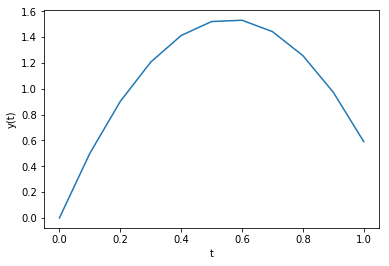

In [10]:
plt.show()

In [12]:
plt.plot(x0,y0,'o-')
plt.xlabel('x')
plt.ylabel('y')

Text(0,0.5,'y')

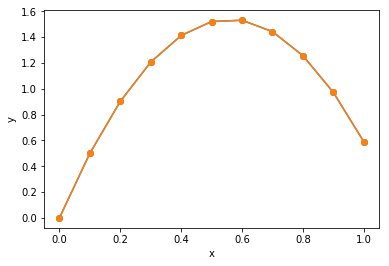

In [13]:
plt.show()

## Numerical Errors for the Euler Method

Because we solve for a discrete set of times, and more importantly, because the Euler method is only approximate, we incur errors in the numerical solution.

To measure such errors, let us make use of the exact solution
\begin{align}
x(t) &= x_0 + u_{0,x} t, \\
v_x(t) &= u_{0,x}, \\
y(t) &= y_0 + u_{0,y} t - \tfrac{1}{2} gt^2, \\
v_y(t) &= u_{0,y} - gt,
\end{align}
to compute:

In [12]:
xx = x0[0] + x1[0]*t
yy = y0[0] + y1[0]*t - 0.5*g*t**2

From the exact solution, we realized that there is no errors for $v_x(t)$, because it is constant, and hence also no errors for $x(t)$. Similarly, there is also no error for $v_y(t)$.

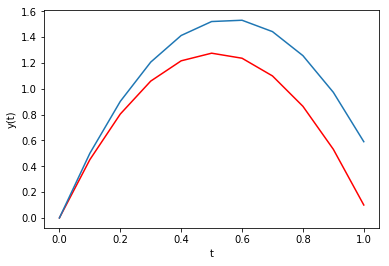

In [16]:
plt.plot(t, yy, 'r')
plt.plot(t, y0)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

As we can see, the numerical error for $y(t)$ is very large, when we use a time step of size $h = 0.1$.

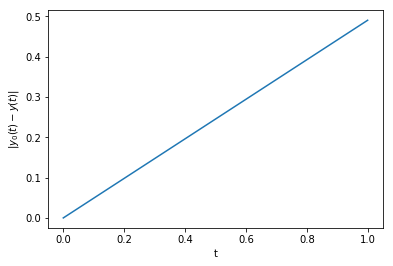

In [17]:
plt.plot(t, np.abs(y0 - yy))
plt.xlabel('t')
plt.ylabel(r'$|y_0(t) - y(t)|$')
plt.show()

For $h = 0.1$, the maximum error is $\epsilon_{\max} = 0.5$.

To reduce the maximum numerical error for the Euler method, we must reduce the time step size $h$.

In the Python code below, let us reorganize the numerical solution for $h = 0.01$ as:

In [14]:
t = np.linspace(0, 1, 101)
x = np.zeros((2,101))
y = np.zeros((2,101))
x[0,0] = 0.0
x[1,0] = 1.0
y[0,0] = 0.0
y[1,0] = 5.0
h = t[1] - t[0]
for i in range(1, 101):
    x[0,i] = x[0,i-1] + h*x[1,i-1]
    x[1,i] = x[1,i-1]
    y[0,i] = y[0,i-1] + h*y[1,i-1]
    y[1,i] = y[1,i-1] + h*(-g)

In [15]:
xx = x[0,0] + x[1,0]*t
yy = y[0,0] + y[1,0]*t - 0.5*g*t**2

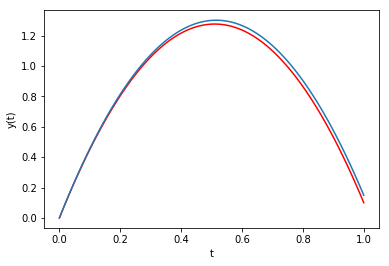

In [16]:
plt.plot(t, yy, 'r')
plt.plot(t, y[0,:])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

With this smaller $h = 0.01$, we see that the numerical solution now agrees with the exact solution much better than for $h = 0.1$.

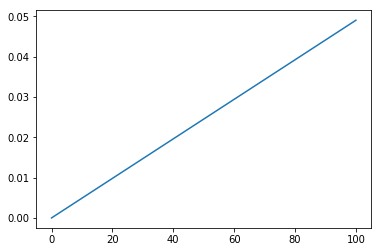

In [18]:
plt.plot(np.abs(y[0,:]-yy))
plt.show()

In [17]:
np.abs(y[0,-1] - yy[-1])

0.049000000000003985

Try for $h = 0.001$, and show that $\epsilon_{\max} \sim O(h)$.

## Second-Order Runge-Kutta

For precise numerical work, the Euler method is not accurate enough, because we would need very small step size to get a decent precision. We need a better method. One such method is the second-order Runge-Kutta method (RK2).

<img src="http://www1.spms.ntu.edu.sg/~cheongsa/RK2.png" width=400>

One of the most important feature of the RK2 method is its evaluation of the gradient at the midpoint $t_i + \frac{h}{2}$.

To use this method, we compute the following quantities:
\begin{align}
k_1 &= h f(t_i, x_i), \\
k_2 &= h f(t_i + \tfrac{1}{2} h, x_i + \tfrac{1}{2} k_1).
\end{align}

Here $k_1$ is $h$ times the exact slope at $(t_i, x_i)$, whereas $k_2$ is $h$ times the approximate slope at the midpoint $(t_i + \tfrac{1}{2}h, x_i + \tfrac{1}{2} k_1)$.

We then solve for $x_{i+1}$ as
\begin{equation}
x_{i+1} = x_i + k_2.
\end{equation}

The overall accuracy of the RK2 method is $O(h^3)$.

We can check this using the Python code shown below:


In [19]:
t = np.linspace(0,1,11)
x = np.zeros((2,11))
y = np.zeros((2,11))

In [20]:
x[0,0] = 0.0
x[1,0] = 1.0
y[0,0] = 0.0
y[1,0] = 5.0
h = t[1] - t[0]
for i in range(1,11):
    k1 = h*x[1,i-1]
    l1 = h*0.0
    k2 = h*(x[1,i-1] + 0.5*l1)
    l2 = h*0.0
    x[0,i] = x[0,i-1] + k2
    x[1,i] = x[1,i-1] + l2
    m1 = h*y[1,i-1]
    n1 = h*(-g)
    m2 = h*(y[1,i-1] + 0.5*n1)
    n2 = h*(-g)
    y[0,i] = y[0,i-1] + m2
    y[1,i] = y[1,i-1] + n2

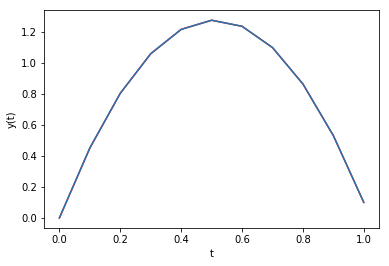

In [21]:
yy = y[0,0] + y[1,0]*t - 0.5*g*t**2
plt.plot(t,yy,'r')
plt.plot(t,y[0,:])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

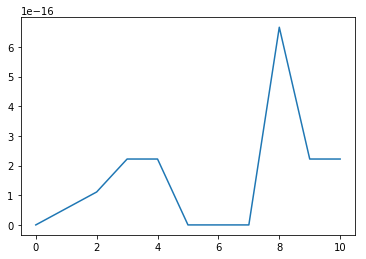

In [22]:
plt.plot(np.abs(y[0,:]-yy))
plt.show()

In [23]:
np.eps

AttributeError: module 'numpy' has no attribute 'eps'

## Fourth-Order Runge-Kutta Method

The RK2 method belongs to a family of methods that becomes more accurate as we go to higher orders. Naturally, the higher the order of the method, the more intermediate slopes we have to compute. In RK2, we compute two slopes $k_1$ and $k_2$, and use only $k_2$ to evaluate $x_{i+1}$. The fourth-order Runge-Kutta method (RK4), in which we compute four slopes $k_1$, $k_2$, $k_3$, and $k_4$, represents the best compromise between increasing complexity of the method, and increasing accuracy. RK4 is often called the <em>workhorse for solving ODEs numerically</em>.

In the RK4 method, the four slopes are
\begin{align}
k_1 &= h f(t_i, x_i), \\
k_2 &= h f(t_i + \tfrac{1}{2} h, x_i + \tfrac{1}{2} k_1), \\
k_3 &= h f(t_i + \tfrac{1}{2} h, x_i + \tfrac{1}{2} k_2), \\
k_4 &= h f(t_i + h, x_i + k_3).
\end{align}
Unlike for RK2, we use all four slopes to evaluate
\begin{equation}
x_{i+1} = x_i + \tfrac{1}{6}(k_1 + 2 k_2 + 2 k_3 + k_4).
\end{equation}

You are welcome to take the numerical analysis course offered by Mathematical Sciences to understand where the coefficients come from.

The RK4 method has an accuracy of $O(h^5)$.

We can check this using the Python code shown below:


In [24]:
t = np.linspace(0,1,11)
x = np.zeros((2,11))
y = np.zeros((2,11))

In [25]:
# set the initial conditions
x[0,0] = 0.0
x[1,0] = 1.0
y[0,0] = 0.0
y[1,0] = 5.0
# determine the time step size
h = t[1] - t[0]
# RK4 updates
for i in range(1,11):
    k1 = h*x[1,i-1]
    l1 = h*0.0
    k2 = h*(x[1,i-1] + 0.5*l1)
    l2 = h*0.0
    k3 = h*(x[1,i-1] + 0.5*l2)
    l3 = h*0.0
    k4 = h*(x[1,i-1] + l3)
    l4 = h*0.0
    x[0,i] = x[0,i-1] + (k1 + 2*k2 + 2*k3 + k4)/6.0
    x[1,i] = x[1,i-1] + (l1 + 2*l2 + 2*l3 + l4)/6.0
    m1 = h*y[1,i-1]
    n1 = h*(-g)
    m2 = h*(y[1,i-1] + 0.5*n1)
    n2 = h*(-g)
    m3 = h*(y[1,i-1] + 0.5*n2)
    n3 = h*(-g)
    m4 = h*(y[1,i-1] + n3)
    n4 = h*(-g)
    y[0,i] = y[0,i-1] + (m1 + 2*m2 + 2*m3 + m4)/6.0
    y[1,i] = y[1,i-1] + (n1 + 2*n2 + 2*n3 + n4)/6.0

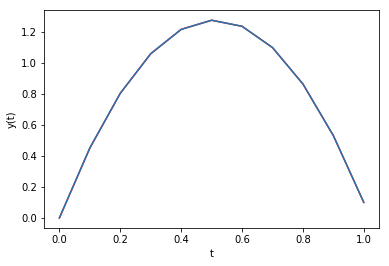

In [26]:
plt.plot(t,yy,'r')
plt.plot(t,y[0,:])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

## Velocity Verlet Method

As it turns out, the RK2 and RK4 methods are good for dissipative problems involving friction and air resistance. They are however not good for conservative problems where
\begin{equation}
m\vec{a} = -\nabla V,
\end{equation}
where $V(\vec{r})$ is a potential function.

For motion under conservative forces, the total energy $E$ is conserved. To enforce this energy conservation, we need compatible numerical methods.

One such method is the <em>velocity Verlet</em> method, where we compute in the order listed below:
<ol>
<li> $\vec{v}(t + \tfrac{1}{2}h) = \vec{v}(t) + \tfrac{1}{2} \vec{a}(t) h$;
<li> $\vec{r}(t + h) = \vec{r}(t) + \vec{v}(t + \tfrac{1}{2} h) h$;
<li> calculate $\vec{a}(t + h)$;
<li> $\vec{v}(t + h) = \vec{v}(t) + \tfrac{1}{2}[\vec{a}(t) + \vec{a}(t + h)] h$.
</ol>

Note that after Step 2, we have $\vec{r}(t + h)$ but do not have $\vec{v}(t + h)$. Fortunately, for conservative forces, we can calculate $\vec{a}(t + h)$ without $\vec{v}(t + h)$ (the appearance of which in the force would make it non-conservative).

Write Python code to integrate harmonic oscillator $a = -\omega^2 x$.

In [2]:
# import modules
import numpy as np
# allocate space for t, x, and v
t = np.linspace(0, 10, 101)
x = np.zeros(101)
v = np.zeros(101)
# initialize x and v
x[0] = 0.0
v[0] = 1.0
# set parameters
w = 1.0
# determine time step size
h = t[1] - t[0]
# velocity Verlet update
for i in range(1,101):
    ai = -w*w*x[i-1]
    vmid = v[i-1] + 0.5*h*ai
    x[i] = x[i-1] + h*vmid
    aii = -w*w*x[i]
    v[i] = v[i-1] + 0.5*h*(ai + aii)

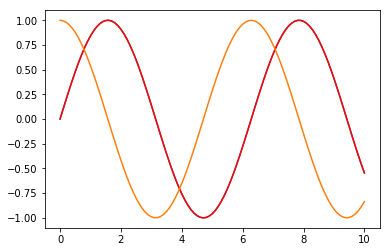

In [5]:
import matplotlib.pyplot as plt
plt.plot(t,x)
plt.plot(t,np.sin(t),'r')
plt.plot(t,v)
plt.show()

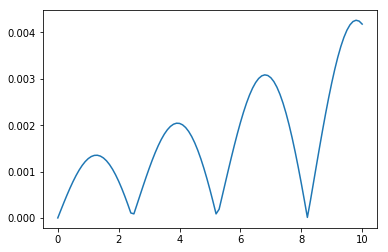

In [7]:
plt.plot(t, np.abs(x - np.sin(t)))
plt.show()

The velocity Verlet method is an example of <em>symplectic integrators</em>, designed for physics problems with conserved quantities.

## Predictor-Corrector Methods

Another class of numerical methods for solving $dx/dt = f(t, x)$, $x(t_0) = x_0$ is the <em>predictor-corrector</em> method.

There are many variants, but the simplest involve first making a <em>prediction step</em>,
\begin{equation}
\tilde{x}_{i+1} = x_i + h f(t_i, x_i),
\end{equation}
followed by a <em>corrector step</em>,
\begin{equation}
x_{i+1} = x_i + \tfrac{1}{2} h [ f(t_i, x_i) + f(t_{i+1}, \tilde{x}_{i+1}) ].
\end{equation}

## Multistep Methods

Instead of $x_{i+1} = x_i + h f(t_i, x_i)$ in the Euler method or $x_{i+1} = x_i + k_2$ in the RK2 method, we can have $x_{i+1}$ depending on more points in the past than just $x_i$.

For example, in the simplest <em>two-step Adam-Bashforth method</em>, we have
\begin{equation}
x_{i+2} = x_{i+1} + \tfrac{3}{2} h f(t_{i+1}, x_{i+1}) - h f(t_i, x_i).
\end{equation}

## Related Problems

Projectile motion with air resistance of the form $-k\vec{v}$, or of the form $-k|\vec{v}|^2 \hat{v}$ ($\hat{v}$ is the unit vector along the direction of $\vec{v}$).

Projectile motion on a spherical Earth.

Simple pendulum.

Kicked pendulum and chaos.

Coupled pendula.
